In [1]:
import torch
import sys

sys.path.append('..')

import SourceCode

In [2]:
from math import pi, e
import matplotlib.pyplot as plt
import torch
from SourceCode.utilities import nth_derivative
from SourceCode.EquationClass import OneDimensionalMainEquation
from SourceCode.DomainClass import OneDimensionalSimpleDomain
from SourceCode.InitConditionClass import OnePointInitialCondition
from SourceCode.TrainerForNNEquationSolver import TrainerForNNEquationSolver
from SourceCode.ReportMaker import ReportMaker
import time


n_epochs = 10
n_points = 10
dh = 1e-3

# Example №1
$$ u_{tt} + 0.2u_t + u = -0.2 exp(-\frac{t}{5}) cos(t) $$
$$ u(0)=0 $$
$$ u(1)= sin(1)*exp(-0.2) $$
$$ t \in [0,1] $$
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

In [7]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda x, nn_model: nth_derivative(nn_model, x, 2)
    + 0.2 * nth_derivative(nn_model, x, 1)
    + nn_model(x)
    + 0.2 * torch.exp(-x / 5) * torch.cos(x)
)
n_points = 20
true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)


first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nn_model(x) - torch.sin(
    torch.Tensor([1])
) * torch.exp(torch.Tensor([-0.2]))
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)


n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 4.687346518039703e-06
Valid max absolute error |Appr(x)-y(x)|: 4.497356712818146e-06
MAPE on train data: 0.0005902947741560638 %
MAPE on validation data: 0.0005662958137691021 %
Max residual square loss on train at last epoch: 0.0002996399998664856 


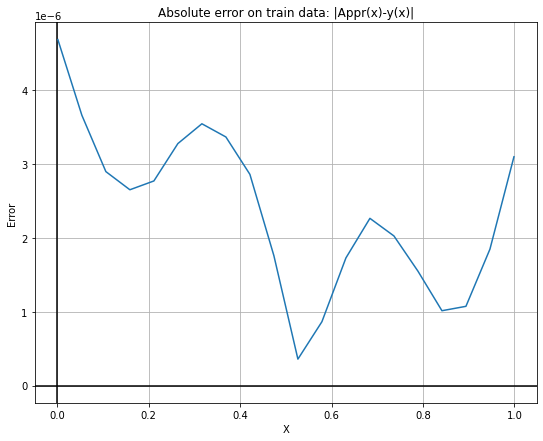

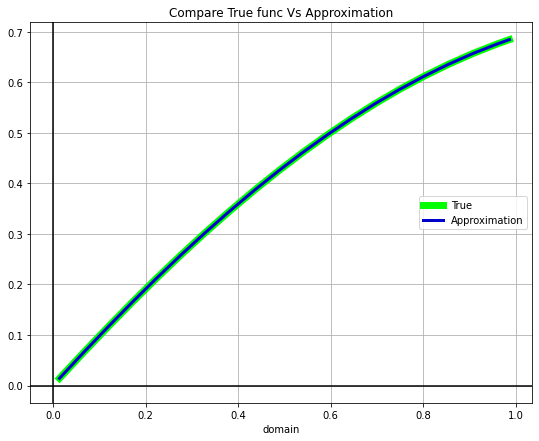

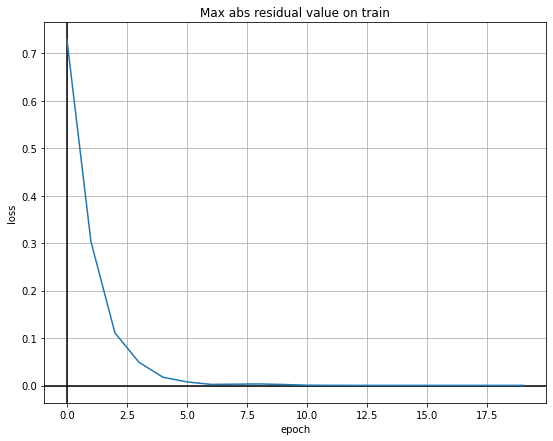

In [8]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

lets try to solve the same problem but on a smaller domain $x \in [0, 0.1]$

In [9]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda x, nn_model: nth_derivative(nn_model, x, 2)
    + 0.2 * nth_derivative(nn_model, x, 1)
    + nn_model(x)
    + 0.2 * torch.exp(-x / 5) * torch.cos(x)
)
n_points = 20
true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
main_domain = OneDimensionalSimpleDomain(left_bound + dh, 0.1, n_points)


first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nn_model(x) - torch.sin(
    torch.Tensor([1])
) * torch.exp(torch.Tensor([-0.2]))
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)


n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.00467962771654129
Valid max absolute error |Appr(x)-y(x)|: 0.00461963564157486
MAPE on train data: 4.783663749694824 %
MAPE on validation data: 4.783137321472168 %
Max residual square loss on train at last epoch: 0.0008778423070907593 


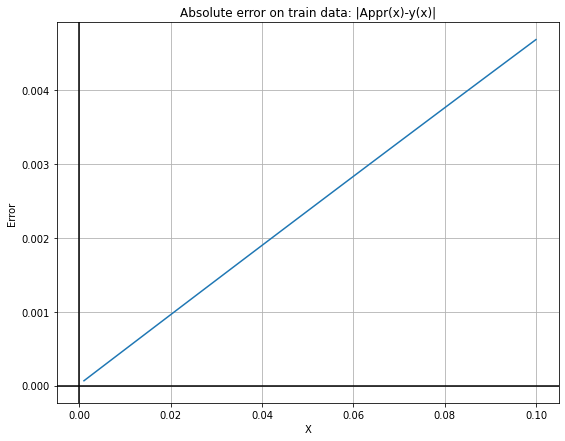

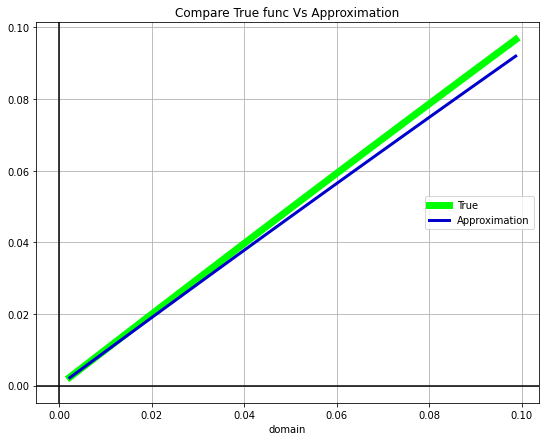

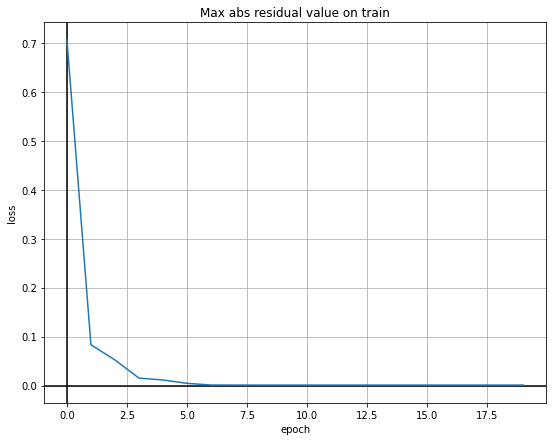

In [10]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

it is strange but descpite my expectations here on a smaller domain NN function performs worse

# Example №2
$$ u_{tt} + 0.2u_t + u = -0.2 exp(-\frac{t}{5})cos(t) $$
$$ u(0)=0 $$
$$ u'(0)=1 $$
$$ t \in [0,2] $$
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

In [11]:
left_bound = 0
right_bound = 2
main_eq_residual = (
        lambda x, nn_model: nth_derivative(nn_model, x, 2)
        + 0.2 * nth_derivative(nn_model, x, 1)
        + nn_model(x)
        + 0.2 * torch.exp(-x / 5) * torch.cos(x)
    )
n_points = 20
true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model,x,1) - 1
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)


n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 1.7702579498291016e-05
Valid max absolute error |Appr(x)-y(x)|: 1.7583370208740234e-05
MAPE on train data: 0.0016664419090375304 %
MAPE on validation data: 0.0016559578943997622 %
Max residual square loss on train at last epoch: 0.0002589374780654907 


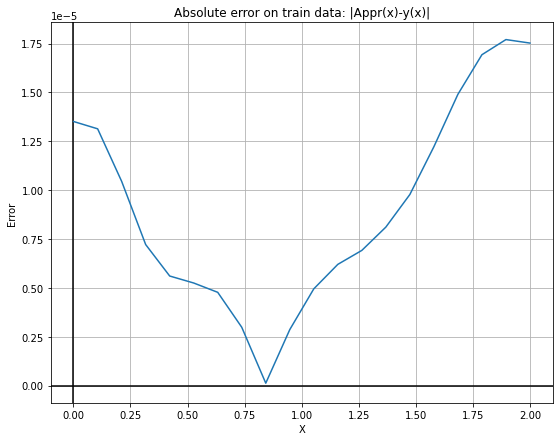

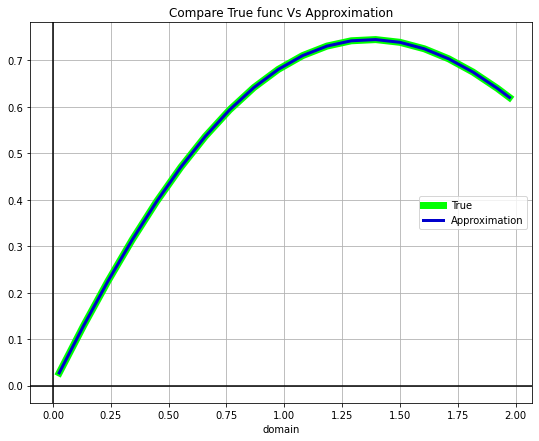

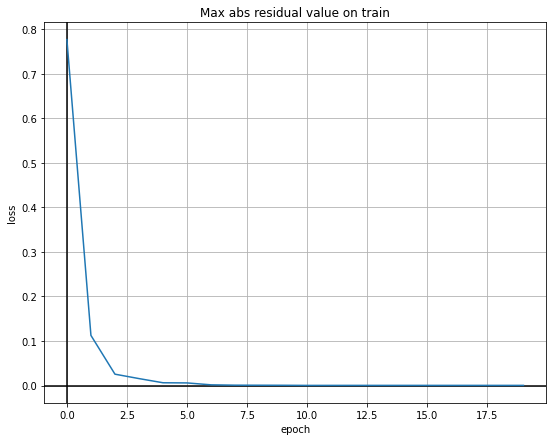

In [12]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

In [13]:
data = torch.linspace(0,10,100)
data = data.view(-1,1)

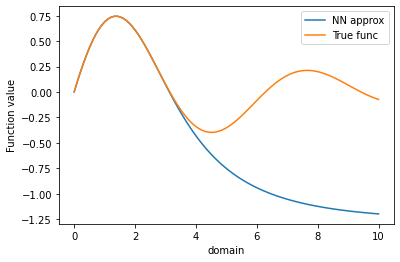

In [14]:
plt.plot(data, nn_model(data).detach().numpy(), label='NN approx')
plt.plot(data, true_solution(data).detach().numpy(), label='True func')
plt.xlabel("domain")
plt.ylabel("Function value")
plt.legend()

hmm, apparently neural networks are not good at extrapolation of an unknown function

$$ u_{tt} + 0.2u_t + u = -0.2 exp(-\frac{t}{5})cos(t) $$
$$ u(0)=0 $$
$$ u'(0)=1 $$
$$ t \in [0,10] $$
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

lets try to solve the same problem but with a bigger domain, $t \in [0,10]$

In [17]:
left_bound = 0
right_bound = 10
main_eq_residual = (
        lambda x, nn_model: nth_derivative(nn_model, x, 2)
        + 0.2 * nth_derivative(nn_model, x, 1)
        + nn_model(x)
        + 0.2 * torch.exp(-x / 5) * torch.cos(x)
    )
n_points = 100
true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)

main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)


first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model, x, 1) - 1
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 80
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 1.9430803060531616
Valid max absolute error |Appr(x)-y(x)|: 1.9427741765975952
MAPE on train data: 473.6617126464844 %
MAPE on validation data: 474.7701110839844 %
Max residual square loss on train at last epoch: 1.2171423435211182 


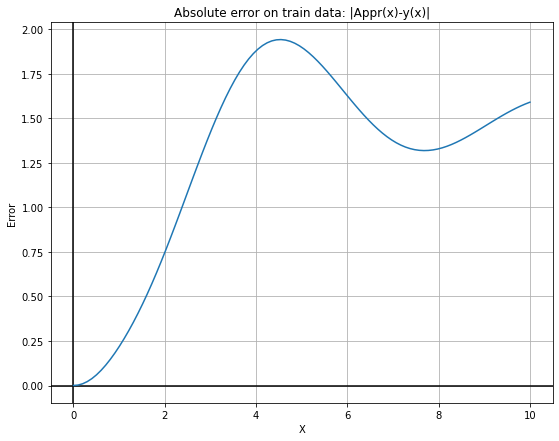

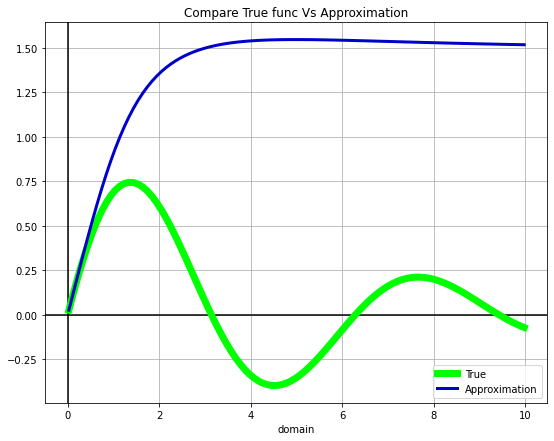

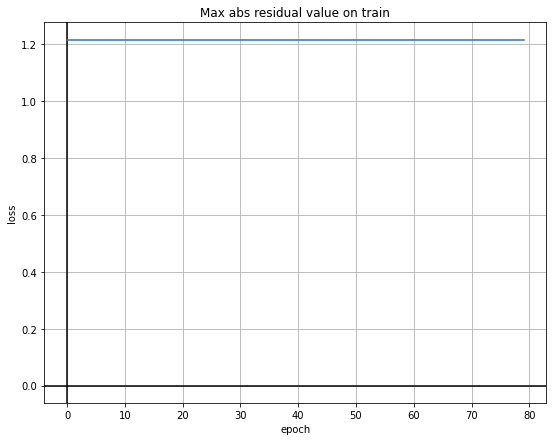

In [18]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

as you can see if domain is big then NN cannot approximate unknown function on a big domain properly

# Example №3
$$ u' + 0.2u = exp(- \frac{t}{5})cos(t) $$
$$ u(0) = 0 $$
$$ t \in [0,20] $$ 
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

In [19]:
left_bound = 0
right_bound = 20
main_eq_residual = (
    lambda variable, function: nth_derivative(function, variable, 1)
    + 0.2 * function(variable)
    -  torch.exp(-variable / 5) * torch.cos(variable)
)
n_points = 40
true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(0, first_init_cond_res)

boundary_conditions = [first_init_cond]


main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)
n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.115288145840168
Valid max absolute error |Appr(x)-y(x)|: 0.11361189931631088
MAPE on train data: 23.135408401489258 %
MAPE on validation data: 23.23201560974121 %
Max residual square loss on train at last epoch: 0.09539179503917694 


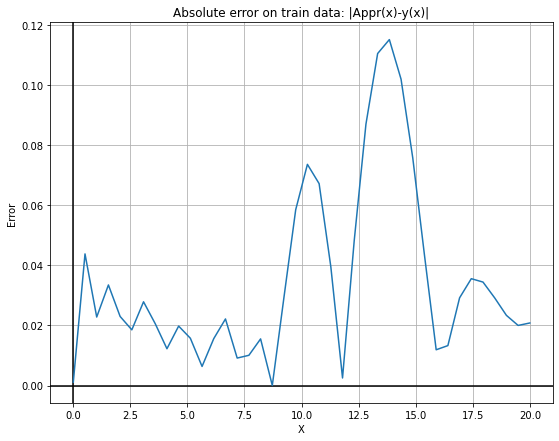

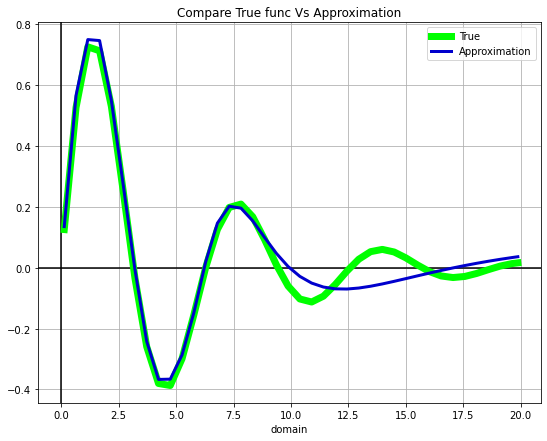

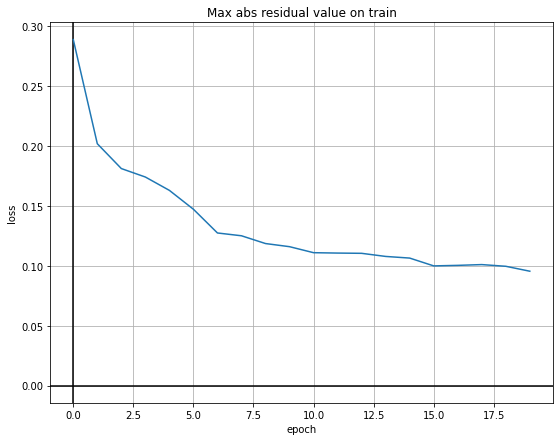

In [20]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №4
$$ u''+4u=cos(2t) $$
$$ u(0)=1 $$
$$ u'(0)=-1 $$
$$ t \in [0,2] $$ 
$$ true\_solution = \frac{1}{4}*t * sin(2*t) + cos(2*t) - \frac{1}{2}sin(2*t) $$

In [23]:
left_bound = 0
right_bound = 2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    + torch.tensor([4.0],requires_grad=True) * function(variable)
    - torch.cos(torch.tensor([2.0],requires_grad=True) * variable)
)
n_points = 20
true_solution = lambda x: 1/4 * x * torch.sin(2*x) + torch.cos(2*x) - 1/2 * torch.sin(2*x)
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model, x, 1) + torch.tensor([1.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.002988755702972412
Valid max absolute error |Appr(x)-y(x)|: 0.0030010342597961426
MAPE on train data: 0.26620155572891235 %
MAPE on validation data: 0.2651560604572296 %
Max residual square loss on train at last epoch: 0.01145249605178833 


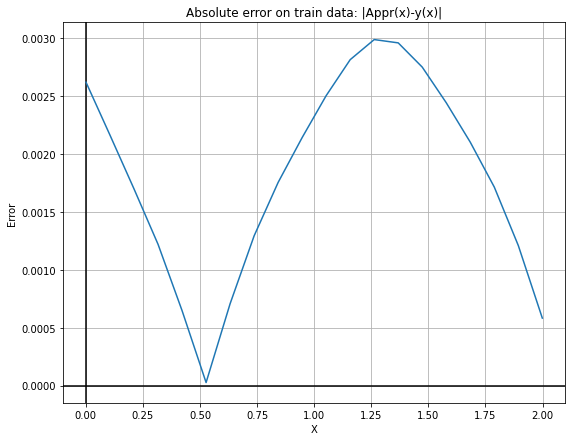

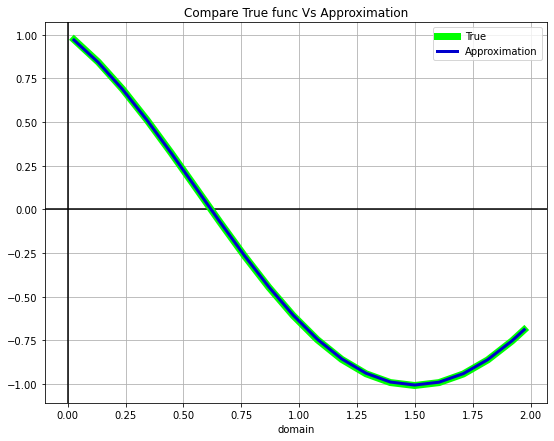

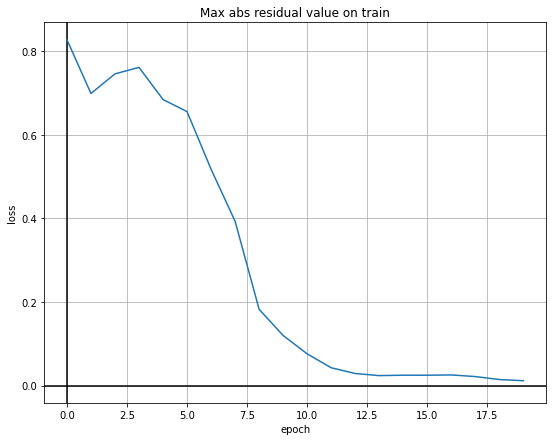

In [24]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

$$ u''+4u=cos(2t) $$
$$ u(0)=1 $$
$$ u'(0)=-1 $$
$$ t \in [0,10] $$ 
$$ true\_solution = \frac{1}{4}*t * sin(2*t) + cos(2*t) - \frac{1}{2}sin(2*t) $$

Again, if we expand domain we will see that there is no convergence. But we can resolve this issue by adding extra points to domain

In [25]:
left_bound = 0
right_bound = 5
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    + torch.tensor([4.0],requires_grad=True) * function(variable)
    - torch.cos(torch.tensor([2.0],requires_grad=True)*variable)
)
n_points = 50
true_solution = lambda x: 1/4 * x * torch.sin(2*x) + torch.cos(2*x) - 1/2 * torch.sin(2*x)
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([1.0], requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model, x, 1) + torch.tensor([1.0], requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 80
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.004874110221862793
Valid max absolute error |Appr(x)-y(x)|: 0.0048885345458984375
MAPE on train data: 0.4640059173107147 %
MAPE on validation data: 0.4640730023384094 %
Max residual square loss on train at last epoch: 0.013779103755950928 


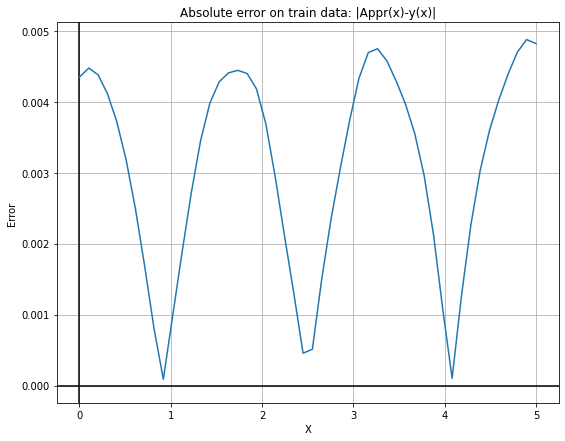

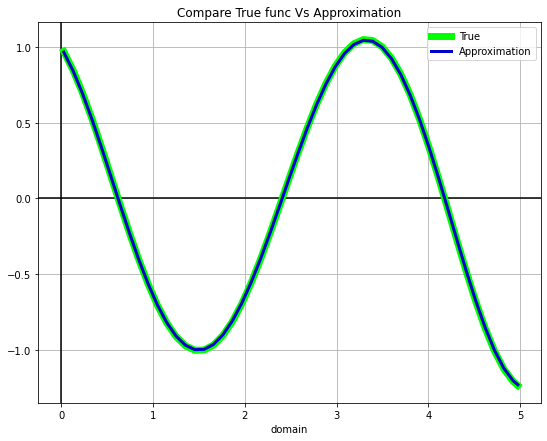

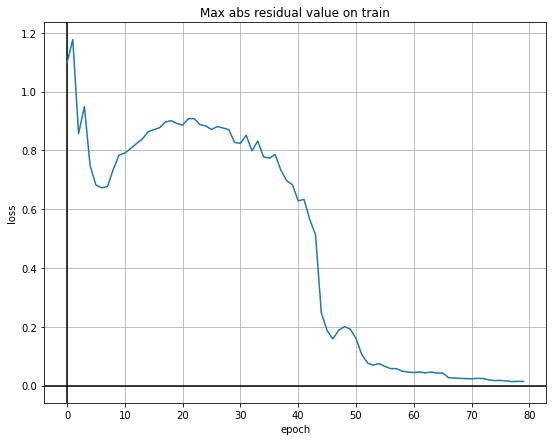

In [26]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №5
$$ u''' - 3u'' + 3u' -u = exp(t) $$
$$ u(0)=1 $$
$$ u'(0)=-1 $$
$$ u''(0)=1 $$
$$ t \in [0,1] $$ 
$$ true\_solution = \frac{1}{6} * exp(t) * (t^3 + 12*t^2-12*t+6) $$

In [27]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function: 
      nth_derivative(function, variable, 3)
    - torch.tensor([3.0]) * nth_derivative(function, variable, 2)
    + torch.tensor([3.0]) * nth_derivative(function, variable, 1)
    - function(variable)
    - torch.exp(variable)
)
n_points = 20
true_solution = lambda x: torch.exp(x) * 1/6 * (x*x*x + 12*x*x- 12*x + 6)
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model, x, 1) + torch.tensor([1.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model: nth_derivative(nn_model, x, 2) - torch.tensor([1.0],requires_grad=True)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]

main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 1.5368729829788208
Valid max absolute error |Appr(x)-y(x)|: 1.445112705230713
MAPE on train data: 24.83755874633789 %
MAPE on validation data: 25.164390563964844 %
Max residual square loss on train at last epoch: 1.2228628396987915 


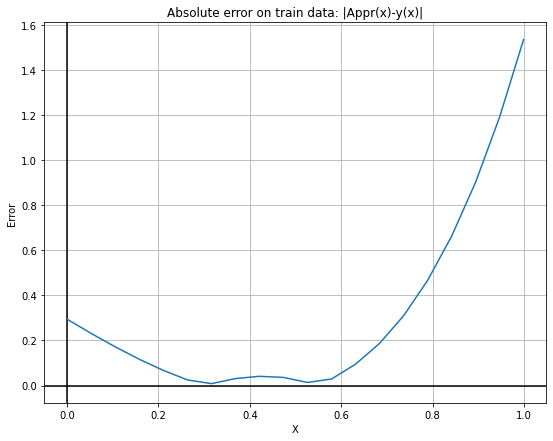

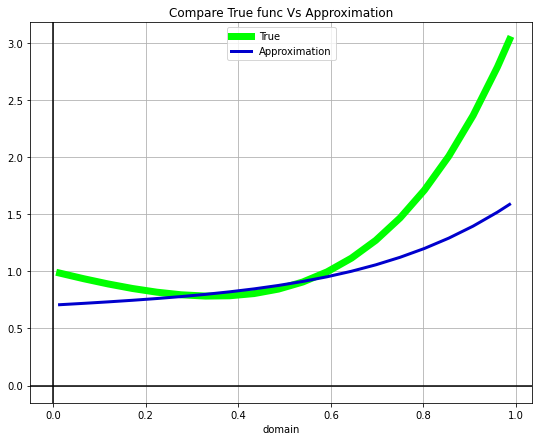

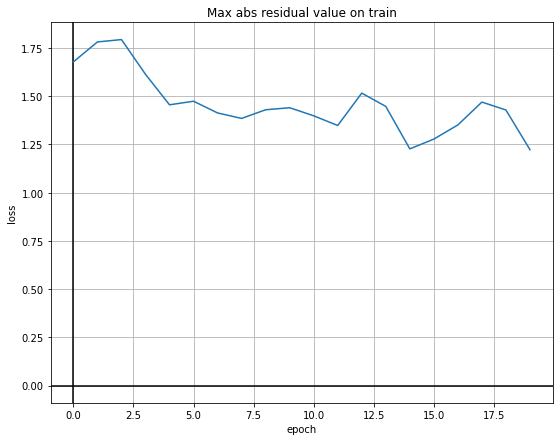

In [28]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №6
$$ u'' + u = -t $$
$$ u(0)=0 $$
$$ t \in [0,1] $$
$$ true\_solution = \frac{sin(x)}{sin(1)} - t $$

In [29]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    + function(variable)
    + variable
)
n_points = 20
true_solution = lambda x: torch.sin(x)/torch.sin(torch.Tensor([1])) - x
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([0.0], requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nn_model(x) - 0
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]


main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 80
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 2.905726432800293e-06
Valid max absolute error |Appr(x)-y(x)|: 2.9653310775756836e-06
MAPE on train data: 0.004116289783269167 %
MAPE on validation data: 0.004199414048343897 %
Max residual square loss on train at last epoch: 7.649138569831848e-05 


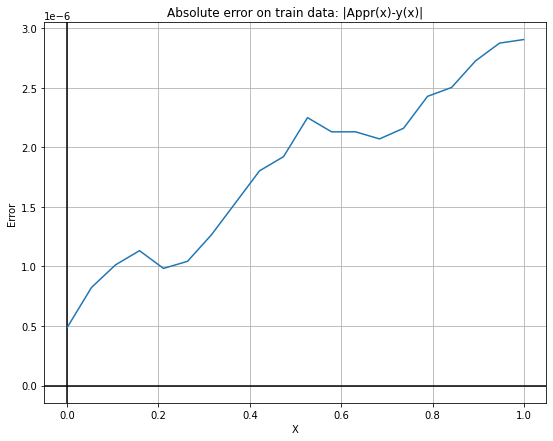

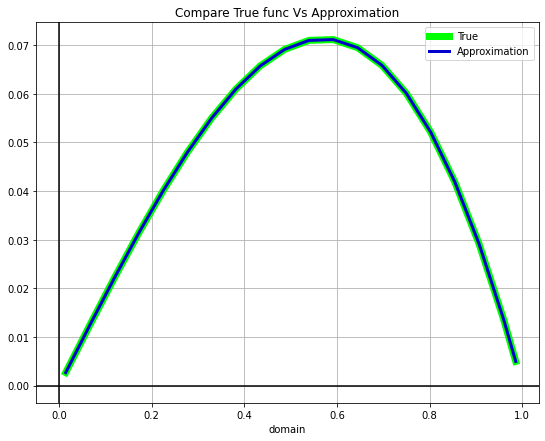

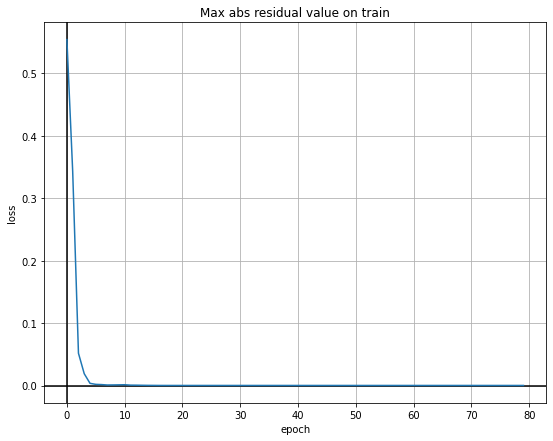

In [30]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №6
$$ u'' + u = 1 $$
$$ u'(0)=0 $$
$$ u(\frac{\pi}{2})-u'(\frac{\pi}{2})= 2 $$
$$ t \in [0,1] $$
$$ true\_solution = 1 + cos(t) $$

In [33]:
left_bound = 0
right_bound = pi/2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    + function(variable)
    - 1
)
n_points = 20
true_solution = lambda x: torch.Tensor([1]) + torch.cos(x)
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nth_derivative(nn_model, x, 1) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nn_model(x) - nth_derivative(nn_model, x, 1) - 2
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]


main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 3.325939178466797e-05
Valid max absolute error |Appr(x)-y(x)|: 3.2901763916015625e-05
MAPE on train data: 0.0014304659562185407 %
MAPE on validation data: 0.0014233061810955405 %
Max residual square loss on train at last epoch: 0.0005689859390258789 


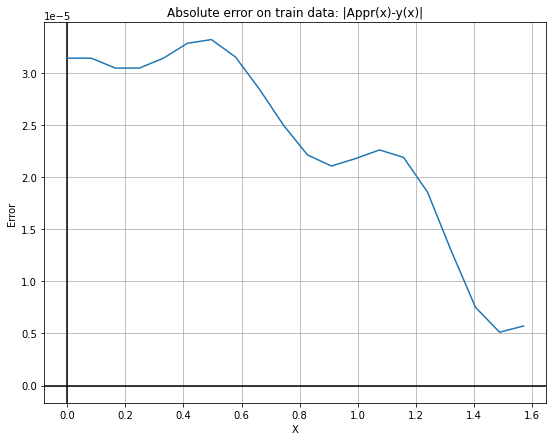

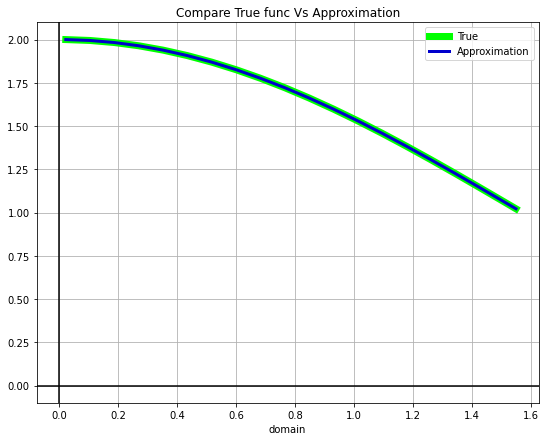

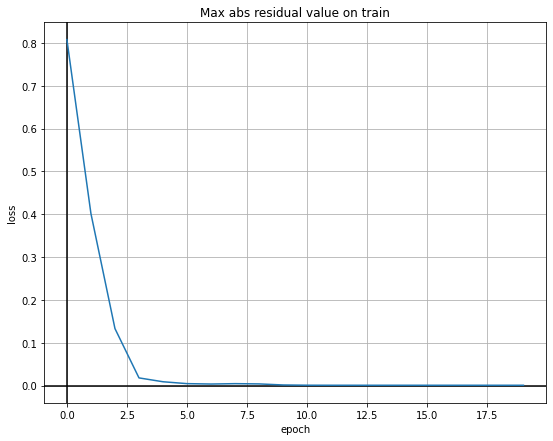

In [34]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №7
$$ u'' - u = 4exp(t) $$
$$ u(0)=0 $$
$$ u'(o)=1 $$
$$ t \in [0,1] $$ 
$$ true\_solution = 2t*exp(t) - sinh(t) $$

In [35]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function: nth_derivative(function, variable, 2)
    - function(variable)
    - torch.tensor([4.0],requires_grad=True) * torch.exp(variable)
)
n_points = 20
true_solution = lambda x: 2 * x * torch.exp(x) - torch.sinh(x)
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model, x, 1) - torch.tensor([1.0], requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]


main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.0037059783935546875
Valid max absolute error |Appr(x)-y(x)|: 0.003665924072265625
MAPE on train data: 0.1679646372795105 %
MAPE on validation data: 0.16451503336429596 %
Max residual square loss on train at last epoch: 0.011261940002441406 


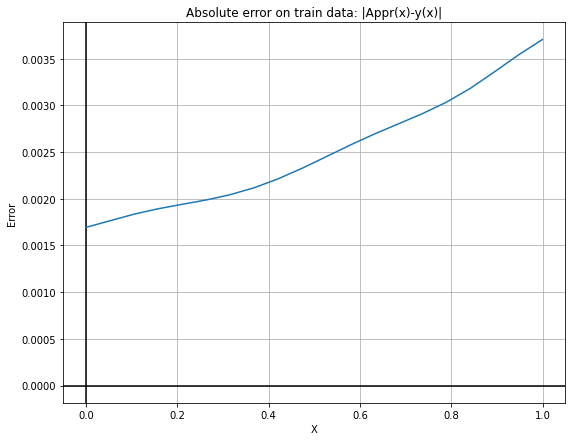

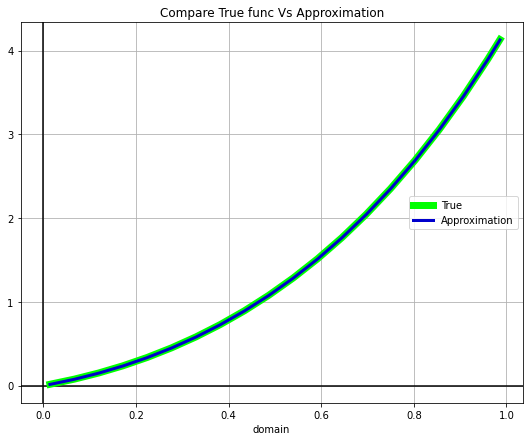

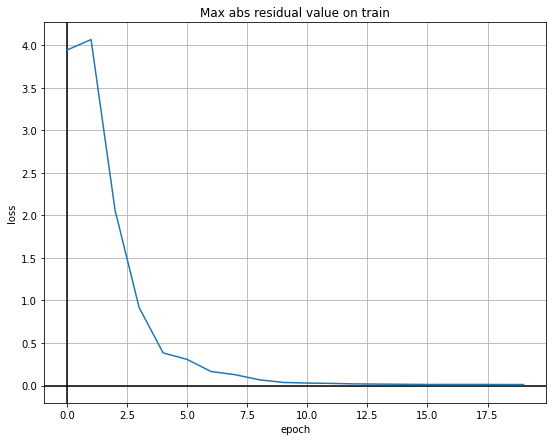

In [36]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №8
$$ (1+t^2)u''-2tu = 0 $$
$$ u(0)=0 $$
$$ u'(0)=3 $$
$$ t \in [0,1] $$
$$ true\_solution = t^3 + 3*t $$

In [3]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: (torch.tensor([1.0],requires_grad=True) + variable*variable)
    * nth_derivative(function, variable, 2)
    - 2 * variable * function(variable)
)
n_points = 20
true_solution = lambda x: (3*x + pow(x,4)/2 - pow(x,6)/5 + pow(x,7)/42 + 
                           3*pow(x,8)/28 - 7*pow(x,9)/360 - 25*pow(x,10)/378)
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model, x, 1) - torch.tensor([3.0], requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.034304141998291016
Valid max absolute error |Appr(x)-y(x)|: 0.029688596725463867
MAPE on train data: 0.23292852938175201 %
MAPE on validation data: 0.23407530784606934 %
Max residual square loss on train at last epoch: 0.002412924077361822 


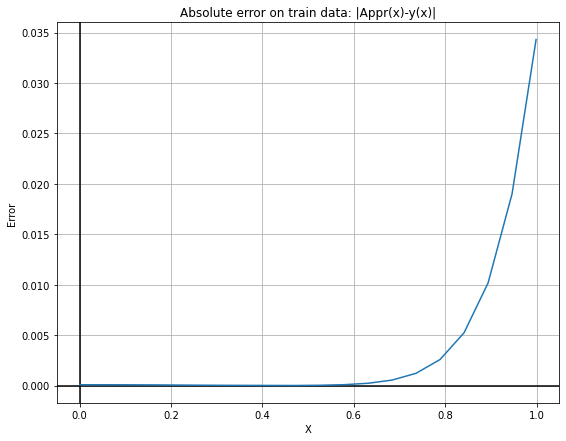

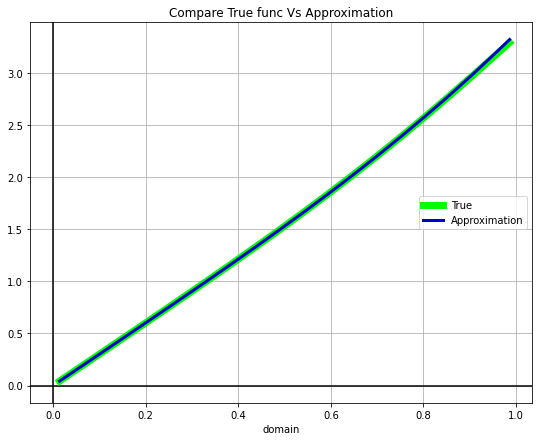

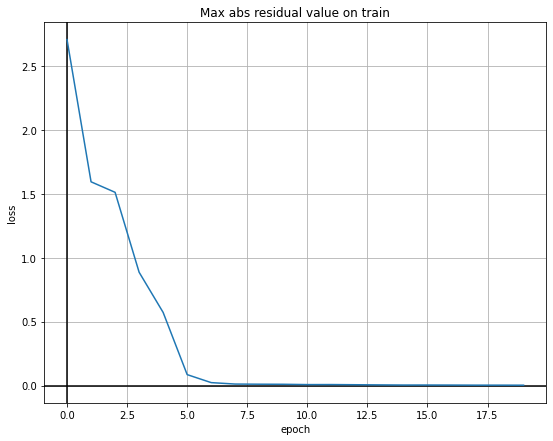

In [4]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №9
$$ u'''+ u'' = \frac{t-1}{t^2} $$
$$ u(1) = \frac{1+e}{e} $$
$$ u'(1) = -\frac{1+e}{e} $$
$$ u''(1) = \frac{1-e}{e} $$
$$ t \in [1,2] $$
$$ true\_sol =  -4t + tln(t) + 7 - 2exp(1-t) + exp(-t) $$

In [5]:
left_bound = 1
right_bound = 2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 3)
    + nth_derivative(function, variable, 2)
    - (variable-1)/(variable**2)
)
n_points = 20
true_solution = lambda x: -x*4 + x * torch.log(x) + 7 - 2 * torch.exp(1-x) + torch.exp(-x)
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - (1+e)/e
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model,x,1) + torch.tensor([(1+e)/e], requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model: nth_derivative(nn_model,x,2) - torch.tensor([(1-e)/e], requires_grad=True)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]

main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 8.314847946166992e-06
Valid max absolute error |Appr(x)-y(x)|: 8.091330528259277e-06
MAPE on train data: 0.0004816404834855348 %
MAPE on validation data: 0.0004918473423458636 %
Max residual square loss on train at last epoch: 0.0004986230051144958 


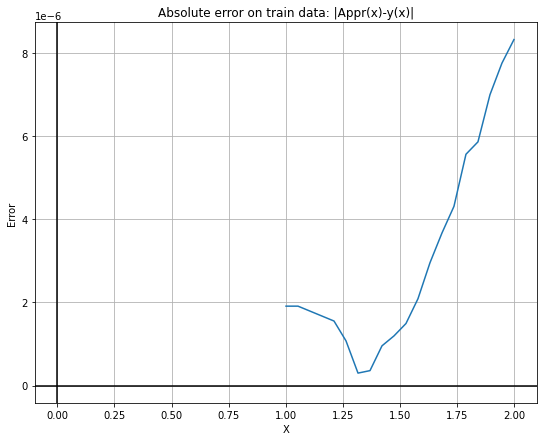

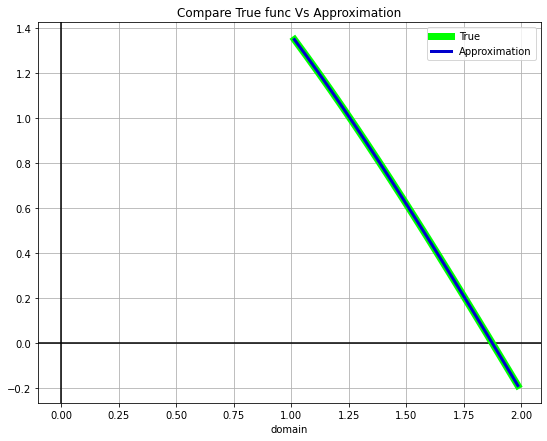

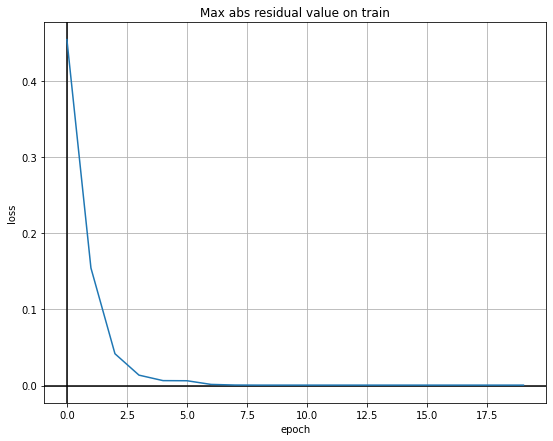

In [6]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №10
$$ u''''+ u'' = \frac{1 + sin^2(t)}{cos^3(t)} $$
$$ u(0) = 1 $$
$$ u'(0) = 0  $$
$$ u''(0) = 0 $$
$$ u'''(0) = 0 $$
$$ t \in [0, 1] $$ 
$$ true\_sol =  (1 + ln(cos(t)))*cos(t) + t * sin(t) $$

In [8]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 4)
    + nth_derivative(function, variable, 2)
    - (torch.tensor([1.0],requires_grad=True) + torch.sin(variable)*torch.sin(variable))
    /(torch.cos(variable)*torch.cos(variable)*torch.cos(variable))
)
n_points = 20
true_solution = lambda x: ((torch.tensor([1.0],requires_grad=True) + torch.log(torch.cos(x))) 
                           * torch.cos(x) + x * torch.sin(x))
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model, x, 1)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model: nth_derivative(nn_model, x, 2)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

fourth_init_cond_res = lambda x, nn_model: nth_derivative(nn_model, x, 3)
fourth_init_cond = OnePointInitialCondition(left_bound, fourth_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond, fourth_init_cond]


main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.0035582780838012695
Valid max absolute error |Appr(x)-y(x)|: 0.0035047531127929688
MAPE on train data: 0.21885061264038086 %
MAPE on validation data: 0.22087548673152924 %
Max residual square loss on train at last epoch: 0.009610176086425781 


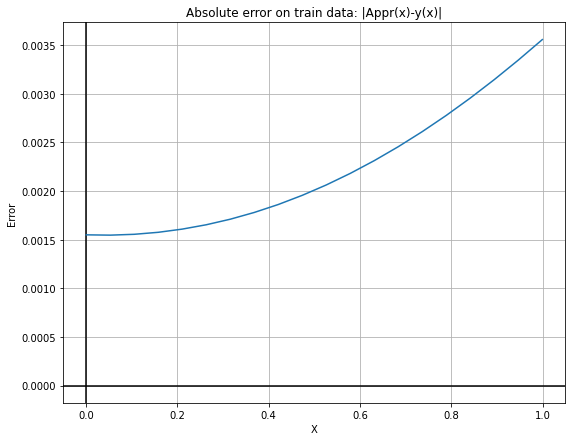

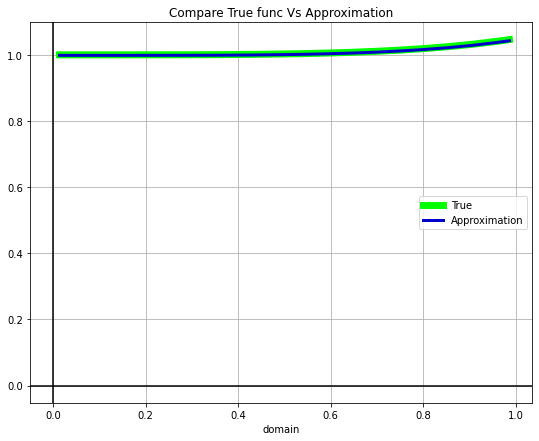

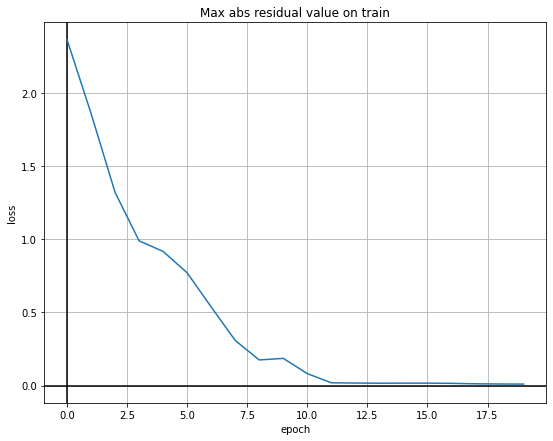

In [9]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №11
$$ u'''+ u' = t*sin(t) + 3*cos(t) $$
$$ u(0) = 1 $$
$$ u'(0) = 2  $$
$$ u''(0) = 0 $$
$$ t \in [0, 1] $$
$$ true\_sol =  1/4 * (-(t^2 - 17) * sin(t) - 9 * t * cos(t) + 4) $$

In [11]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 3)
    + nth_derivative(function, variable, 1)
    - variable * torch.sin(variable) - 3 * torch.cos(variable)
)
n_points = 20
true_solution = lambda x: 1/4*(-(x**2-17)*torch.sin(x)-9*x*torch.cos(x)+4)
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([1.0], requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model, x, 1) - torch.tensor([2.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model: nth_derivative(nn_model,x,2)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]


main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.02400493621826172
Valid max absolute error |Appr(x)-y(x)|: 0.023462533950805664
MAPE on train data: 0.5206626653671265 %
MAPE on validation data: 0.5183652639389038 %
Max residual square loss on train at last epoch: 0.033622026443481445 


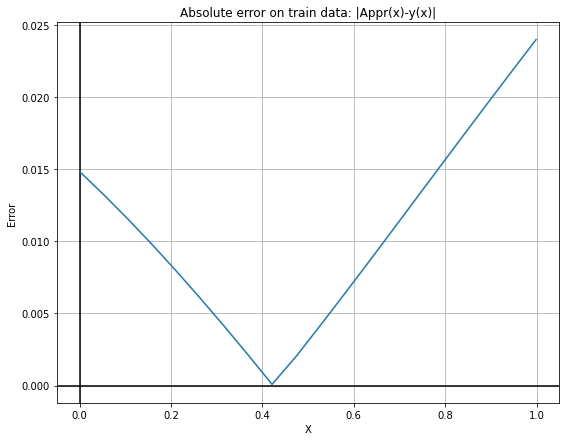

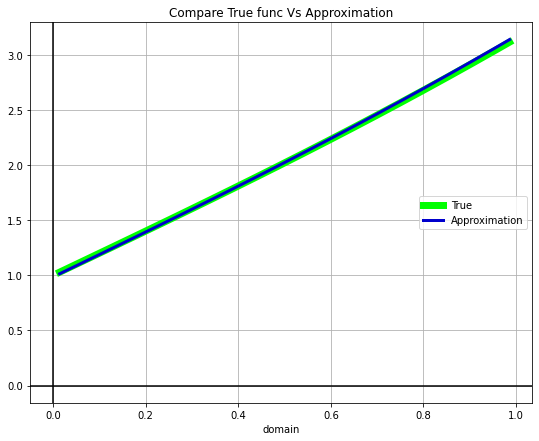

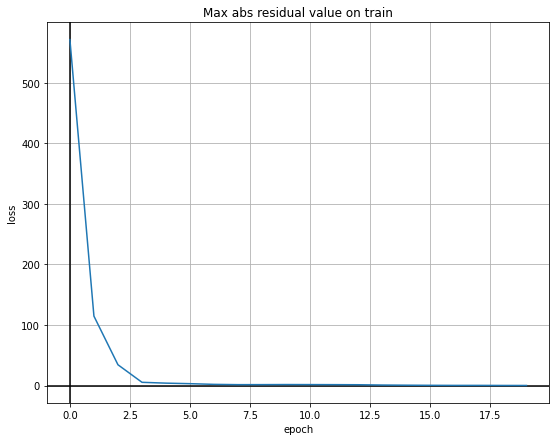

In [12]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №12. A physical problem 

A rubber cord with a length of **1** meter is extended by **kf** meters under the action of a force **f** kg. 

By how much will the same cord of length **l** and weight **m** be extended under the action of its own weight, if it is hung at one end?

$$ u'= \frac{km}{l}(l-x) $$
$$ u(0) = 0 $$
$$ x \in [0, l] $$
$$ true\_sol =  \frac{km}{2l}*(l-x)x $$

Lets assume that $l = 3$ meters, $m = 5$ kg, $k = 2\frac{Newton}{meter}$

In [13]:
l = 10
m = 5
k = 2
left_bound = 0
right_bound = l
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 1)
    - k*m/l*(l-variable)
)
n_points = 50
true_solution = lambda x: k*m/(2*l)*(2*l-x)*x
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
first_init_cond_res = lambda x, nn_model: nn_model(x)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

boundary_conditions = [first_init_cond]


main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.003326416015625
Valid max absolute error |Appr(x)-y(x)|: 0.003330230712890625
MAPE on train data: 0.006272479891777039 %
MAPE on validation data: 0.006224474869668484 %
Max residual square loss on train at last epoch: 0.007638454437255859 


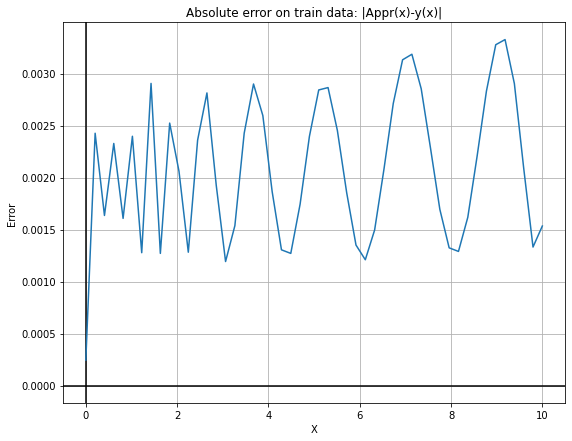

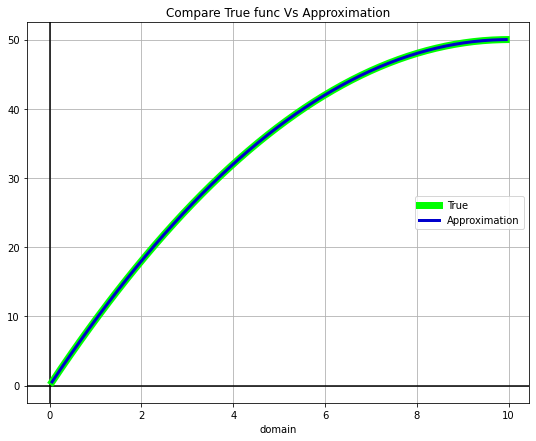

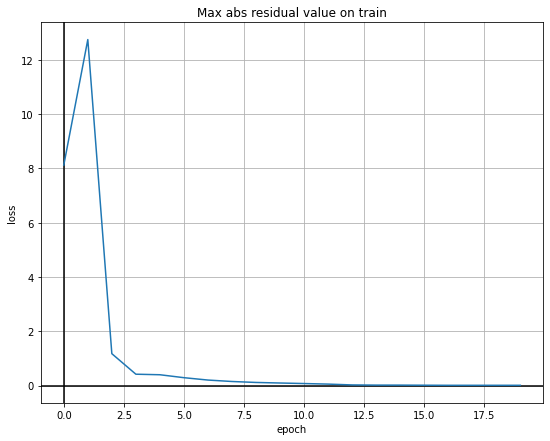

In [14]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №13
$$ y''+ xy' + \sqrt{x}T_x^{0.5} - 2y= -6x-4x^3 <=> y''+ 2xy' - 2y= -6x-4x^3$$
$$ y(0) = 0 $$
$$ y(1) = 0  $$
$$ x \in [0, 1] $$
$$ true\_sol =  x^2 - x^3 $$

In [15]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function: 
    nth_derivative(function, variable, 2)
    + 2 * variable * nth_derivative(function, variable, 1)
    - 2 * function(variable)
    + 6 * variable + 4 * torch.pow(variable, 3)
)
n_points = 20
true_solution = lambda x: x * (1 - x * x)
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nn_model(x)
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)
boundary_conditions = [first_init_cond, second_init_cond]


start_time = time.time()
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.2262814044952393 seconds ---


Train max absolute error |Appr(x)-y(x)|: 0.00015792320482432842
Valid max absolute error |Appr(x)-y(x)|: 0.00015518255531787872
MAPE on train data: 0.024202723056077957 %
MAPE on validation data: 0.023239685222506523 %
Max residual square loss on train at last epoch: 0.0019192742183804512 


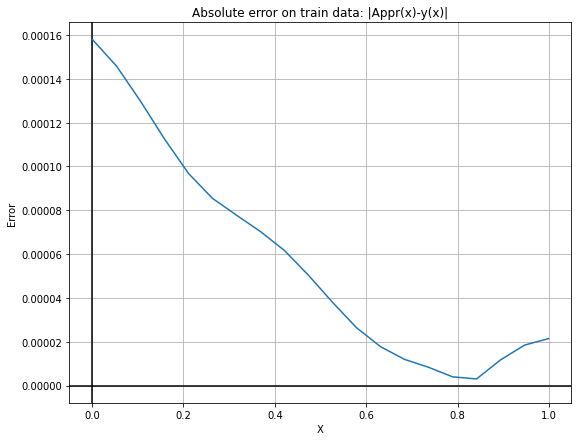

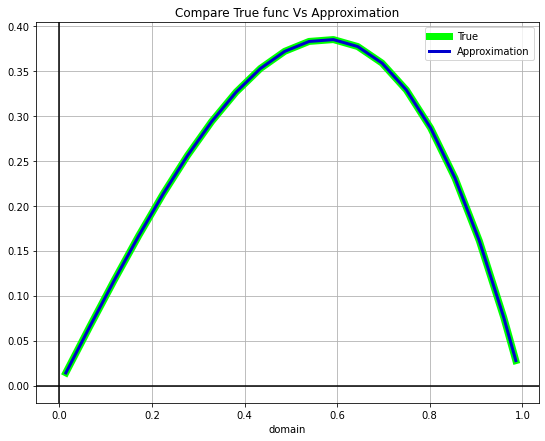

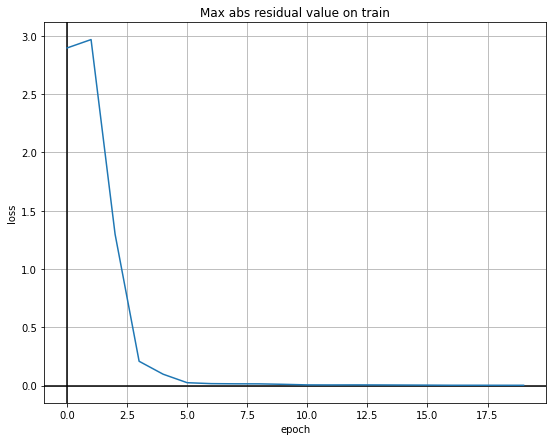

In [16]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

In [17]:
table_arr = main_domain.get_valid_domain()
table_arr = torch.cat([torch.Tensor([[left_bound]]), table_arr, torch.Tensor([[right_bound]])], dim = 0)

       Input  Analytical       ANN     Error
0   0.000000    0.000000 -0.000158  0.000158
1   0.014132    0.014129  0.013974  0.000155
2   0.066658    0.066362  0.066219  0.000142
3   0.119184    0.117491  0.117365  0.000126
4   0.171711    0.166648  0.166539  0.000108
5   0.224237    0.212962  0.212868  0.000094
6   0.276763    0.255564  0.255480  0.000083
7   0.329289    0.293584  0.293508  0.000076
8   0.381816    0.326153  0.326085  0.000068
9   0.434342    0.352402  0.352343  0.000059
10  0.486868    0.371461  0.371413  0.000047
11  0.539395    0.382460  0.382425  0.000035
12  0.591921    0.384529  0.384505  0.000024
13  0.644447    0.376800  0.376784  0.000016
14  0.696974    0.358403  0.358392  0.000011
15  0.749500    0.328468  0.328461  0.000007
16  0.802026    0.286126  0.286124  0.000002
17  0.854553    0.230507  0.230512  0.000005
18  0.907079    0.160741  0.160755  0.000013
19  0.959605    0.075960  0.075980  0.000019
20  0.985868    0.027667  0.027688  0.000021
21  1.0000